In [1]:
pip install seaborn

     |████████████████████████████████| 285 kB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic = titanic.drop(columns = ["Name","Ticket","Cabin"])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [7]:
titanic = titanic.dropna()

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [8]:
titanic["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [9]:
titanic["Sex"] = titanic["Sex"].map({"female":0,"male":1})
titanic["Embarked"] = titanic["Embarked"].map({"C":0,"Q":1,"S":2})
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [11]:
titanic["Survived"].unique()

array([0, 1])

In [12]:
feature_cols = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']

In [13]:
x = titanic.drop(columns = ["Survived"])
y = titanic["Survived"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
print("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.7972027972027972


[[65 17]
 [12 49]]


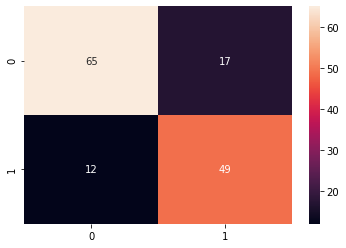

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot = True)
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.74      0.80      0.77        61

    accuracy                           0.80       143
   macro avg       0.79      0.80      0.79       143
weighted avg       0.80      0.80      0.80       143



In [21]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install pydotplus

     |████████████████████████████████| 278 kB 4.4 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=bb0061c20a66403063d8f75600c6ceffe149c371dd9502bad948179250f9dd28
  Stored in directory: /home/jovyan/.cache/pip/wheels/1f/5c/ba/f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pydotplus

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image 

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png('Titanic_Tree.png')

Image(graph.create_png())

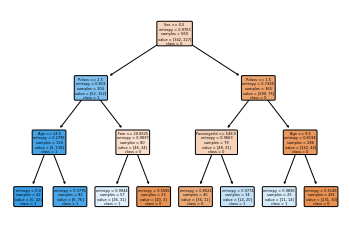

In [27]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=model, feature_names = x.columns, 
                     class_names =["0","1"] , filled = True , precision = 4, rounded = True)